# Telecom Plan Analysis

## Open the Data File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import time
import seaborn as sns

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

display(calls.head())
display(calls.info())
display(internet.head())
display(internet.info())
display(messages.head())
display(messages.info())
display(plans.head())
display(plans.info())
display(users.head())
display(users.info())

#Search for duplicates
display(calls.duplicated().sum())
display(internet.duplicated().sum())
display(messages.duplicated().sum())
display(users.duplicated().sum())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

0

0

0

0

### Conclusion 
There are two types of plans in the company surf and ultimate. There are data tables for user and plan data as well as messages, calls, and data usage throughout the year of 2018. We will use these tables to find which plan makes the company more profit.

The churn_date column of users table has 466 missing values. The churn date is the date the user stopped using service. The missing values in the column are due to user accounts still active when the data was analyzed. We replaced values with the date 2018-12-31. This will not affect the data since the churn date is not needed for analysis.

## Prepare the Data

In [2]:
#Fill in missing values in column churn_date for table users.
users['churn_date'] = users['churn_date'].fillna('2018-12-31')
users.isnull().sum()

#Change data types in users table
users['churn_date'] = pd.to_datetime(users['churn_date']).dt.date
display(users.head())

#Change data types in calls table
calls['duration'] = np.ceil(calls['duration']).astype(int) 
calls['call_date'] = pd.to_datetime(calls['call_date']).dt.date
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls['month'] = calls['month'].astype(int)
display(calls.head())

#Change data types in internet table
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date']).dt.date
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
display(internet.head())

#Change data types in messages table
messages['message_date'] = pd.to_datetime(messages['message_date']).dt.date
display(messages.head())
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,90,12
1,1000_204,1000,2018-12-31,0,12
2,1000_379,1000,2018-12-28,661,12
3,1000_413,1000,2018-12-26,271,12
4,1000_442,1000,2018-12-27,881,12


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Data Preprocessing:

In the 'users' table we changed the missing values in the column 'churn_date' table to 2018-12-31, since it is the last date in the year. We converted the data in column 'churn_date' to a Datetime object.

In 'calls' table we converted the column 'call_date' to a Datetime object. We added the column 'month' to the 'calls' table from abstracting the month from the 'call_date' column. We converted columns 'month' and 'duration' to integer type.

We converted the column 'session_date' in the 'internet' column to a Datetime object. We added the column 'month' to the 'internet' table from abstracting the month from the 'session_date' column.

In 'message' table we converted the column 'message_date' to a Datetime object. We added the column 'month' to the 'messag' table from abstracting the month from the 'message_date' column.

In [3]:
#Process errors in data
for index, row in users.iterrows():
    user_id = row['user_id']
    churn_date = row['churn_date']
    
    calls.drop(calls.index[(calls['user_id'] == user_id) &(calls['call_date'] > churn_date)], inplace=True)
    messages.drop(messages.index[(messages['user_id'] == user_id) &(messages['message_date'] > churn_date)], inplace=True)
    internet.drop(internet.index[(internet['user_id'] == user_id) &(internet['session_date'] > churn_date)], inplace=True)


In [4]:
#Find anomalies in "calls" table
std_calls = np.std(calls['duration'])
mean_calls = np.mean(calls['duration'])
anomaly_cut_off_calls = std_calls * 3
lower_limit_calls =  mean_calls - anomaly_cut_off_calls
display(lower_limit_calls)
upper_limit_calls = mean_calls + anomaly_cut_off_calls
display(upper_limit_calls)

calls.drop(calls.index[(calls['duration'] > 24)], inplace = True)
display(calls.info())
display(calls.describe())

#Find anomalies in "internet" table
std_internet = np.std(internet['mb_used'])
mean_internet = np.mean(internet['mb_used'])
anomaly_cut_off_internet = std_internet * 3
lower_limit_internet =  mean_internet - anomaly_cut_off_internet
display(lower_limit_internet)
upper_limit_internet = mean_internet + anomaly_cut_off_internet
display(upper_limit_internet)

internet.drop(internet.index[(internet['mb_used'] > 1198)], inplace = True)
display(internet.info())
display(internet.describe())



-10.716277361872603

25.004953219233816

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134093 entries, 0 to 137734
Data columns (total 5 columns):
id           134093 non-null object
user_id      134093 non-null int64
call_date    134093 non-null object
duration     134093 non-null int64
month        134093 non-null int64
dtypes: int64(3), object(2)
memory usage: 6.1+ MB


None

,user_id,duration,month
count,134093.000000,134093.000000,134093.000000
mean,1247.361577,7.044439,9.282170
std,138.881057,5.798964,2.418258
min,1000.000000,0.000000,1.000000
25%,1130.000000,2.000000,8.000000
50%,1247.000000,6.000000,10.000000
75%,1365.000000,11.000000,11.000000
max,1499.000000,24.000000,12.000000


-464.57537676604056

1200.5523799508162

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101997 entries, 0 to 104824
Data columns (total 5 columns):
id              101997 non-null object
user_id         101997 non-null int64
session_date    101997 non-null object
mb_used         101997 non-null int64
month           101997 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


None

,user_id,mb_used,month
count,101997.000000,101997.000000,101997.000000
mean,1241.999265,364.658892,9.300342
std,141.314113,272.307486,2.407045
min,1000.000000,0.000000,1.000000
25%,1122.000000,137.000000,8.000000
50%,1236.000000,344.000000,10.000000
75%,1366.000000,554.000000,11.000000
max,1499.000000,1198.000000,12.000000


Process Errors and Anomalies:

We notice there were errors for calls, messages, and internet sessions. Some of the dates for these sessions are posted after the churn date(date service ends) for the client. We assumed this was just a mistake and removed the rows that have the date for calls/messages/interent sessions beyond the churn date.

We checked the data for anomalies and noticed the 'internet' table and 'calls' table had outliers. The mean and median of the data are close which means the data is normally distributed. We can use the 3 sigmas rule to find lower and upper outliers. There are no lower outliers for the 'internet' and 'calls' table. By using the 3 sigmas rule we found that any data above 1198 in the column 'mb_used' from the 'internet' table is considered an outlier. We also found any data above 24 in the 'duration' column of the 'calls' table to be an outlier. We have dropped any outliers from both tables.

Other anomalies from the 'duration' and 'mg_used' column were zero values. We could not remove these values since they were a significant amount of the data. This could be an error in the data. It is possible the client did not use the internet service for a month. A possibility for zeros in the 'duration' column could be that the call only lasted a few seconds.

### Calls Per User

In [5]:
#Merge users table and calls table
calls_plan = users.merge(calls, on = 'user_id', how = 'outer')
calls_plan.head()
calls_plan.isnull().sum()

calls_plan.dropna(subset = ['id'], inplace = True)
calls_plan.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
id            0
call_date     0
duration      0
month         0
dtype: int64

In [6]:
#Calls per month for ultimate plan
calls_ultimate = calls_plan.query('plan == "ultimate"')
calls_ultimate_per_user = calls_ultimate.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count','sum'])
calls_ultimate_per_user.columns = ['calls_per_month', 'minutes_used_per_month']
calls_ultimate_per_user.reset_index(inplace = True)
calls_ultimate_per_user.head()

,user_id,month,calls_per_month,minutes_used_per_month
0,1000,12.0,16,124.0
1,1006,11.0,2,10.0
2,1006,12.0,7,36.0
3,1008,10.0,71,476.0
4,1008,11.0,61,393.0


In [7]:
#Calls per month for surf plan
calls_surf = calls_plan.query('plan == "surf"')
calls_surf_per_user = calls_surf.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count','sum'])
calls_surf_per_user.columns = ['calls_per_month', 'minutes_used_per_month']
calls_surf_per_user.reset_index(inplace = True)
calls_surf_per_user.head()

,user_id,month,calls_per_month,minutes_used_per_month
0,1001,8.0,27,182.0
1,1001,9.0,49,315.0
2,1001,10.0,65,393.0
3,1001,11.0,63,396.0
4,1001,12.0,54,358.0


### Messages Per User

In [8]:
#Merge messages table and users table
messages_plan = users.merge(messages, on = 'user_id', how = 'outer')
messages_plan.head()
messages_plan.isnull().sum()

messages_plan.dropna(subset = ['id'], inplace = True)
messages_plan.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date      0
id              0
message_date    0
month           0
dtype: int64

In [9]:
#Messages per month for ultimate plan
messages_ultimate = messages_plan.query('plan == "ultimate"')
messages_ultimate.head()
messages_ultimate_per_user = messages_ultimate.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc = ['count'])
messages_ultimate_per_user.columns = ['messages_used_per_month']
messages_ultimate_per_user.reset_index(inplace = True)
messages_ultimate_per_user.head()

,user_id,month,messages_used_per_month
0,1000,12.0,11
1,1006,11.0,15
2,1006,12.0,89
3,1008,10.0,21
4,1008,11.0,37


In [10]:
#Messages per month for surf plan
messages_surf = messages_plan.query('plan == "surf"')
messages_surf.head()
messages_surf_per_user = messages_surf.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc = ['count'])
messages_surf_per_user.columns = ['messages_used_per_month']
messages_surf_per_user.reset_index(inplace = True)
messages_surf_per_user.head()

,user_id,month,messages_used_per_month
0,1001,8.0,30
1,1001,9.0,44
2,1001,10.0,53
3,1001,11.0,36
4,1001,12.0,44


### Usage Per User

In [11]:
#Merge internet table and users table
internet_plan = users.merge(internet, on = 'user_id', how = 'outer')
internet_plan.head()
internet_plan.isnull().sum()

internet_plan.dropna(subset = ['id'], inplace = True)
internet_plan.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date      0
id              0
session_date    0
mb_used         0
month           0
dtype: int64

In [12]:
#Internet usage per month for ultimate plan
internet_ultimate = internet_plan.query('plan == "ultimate"')
internet_ultimate_per_user = internet_ultimate.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = ['sum'])
internet_ultimate_per_user.columns = ['mb_used_per_month']
internet_ultimate_per_user.reset_index(inplace = True)

#Add gb per month to table
internet_ultimate_per_user['gb_used_per_month'] = np.ceil(internet_ultimate_per_user['mb_used_per_month'] / 1024)
internet_ultimate_per_user.head()

,user_id,month,mb_used_per_month,gb_used_per_month
0,1000,12.0,1903.0,2.0
1,1006,11.0,2072.0,3.0
2,1006,12.0,17720.0,18.0
3,1008,10.0,17131.0,17.0
4,1008,11.0,23706.0,24.0


In [13]:
#Internet usage per month for surf plan
internet_surf = internet_plan.query('plan == "surf"')
internet_surf_per_user = internet_surf.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = ['sum'])
internet_surf_per_user.columns = ['mb_used_per_month']
internet_surf_per_user.reset_index(inplace = True)

#Add gb per month to table
internet_surf_per_user['gb_used_per_month'] = np.ceil(internet_surf_per_user['mb_used_per_month'] / 1024)
internet_surf_per_user.head()

,user_id,month,mb_used_per_month,gb_used_per_month
0,1001,8.0,6929.0,7.0
1,1001,9.0,13333.0,14.0
2,1001,10.0,22356.0,22.0
3,1001,11.0,18524.0,19.0
4,1001,12.0,19398.0,19.0


We seperated the data based on which plan the user is paying for. Both surf and ultimate plan has a pivot table that counts the calls per month and sums up the minutes/messages/internet usage per month.

### Revenue Per User

In [14]:
#Pivot table for ultimate plan
ultimate = messages_ultimate_per_user.merge(calls_ultimate_per_user, on = ['user_id', 'month'], how = 'outer')
ultimate.head()
ultimate_plan = ultimate.merge(internet_ultimate_per_user, on = ['user_id', 'month'], how = 'outer')
ultimate_plan.isnull().sum()

ultimate_plan.dropna(inplace = True)
ultimate_plan.isnull().sum()

# Monthly profit per user for ultimate plan
def profit(row):
    user_id = row['user_id']
    gb_used = row['gb_used_per_month']
    messages_used = row['messages_used_per_month']
    minutes_used = row['minutes_used_per_month']

    remaining_gb = gb_used - 30
    remaining_messages = messages_used - 1000
    remaining_minutes = minutes_used - 3000
    
    data_cost = 0
    message_cost = 0
    minute_cost = 0
    
    if remaining_gb > 0:
        data_cost = remaining_gb * 7
        
    if remaining_messages > 0:
        message_cost = remaining_messages * 0.01
        
    if remaining_minutes > 0:
        minute_cost = remaining_minutes * 0.01
        
    profit = data_cost + message_cost + minute_cost + 70
    
    return profit

ultimate_plan['monthly_cost'] = ultimate_plan.apply(profit, axis = 1)
ultimate_plan.head()
ultimate_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 573
Data columns (total 8 columns):
user_id                    569 non-null int64
month                      569 non-null float64
messages_used_per_month    569 non-null float64
calls_per_month            569 non-null float64
minutes_used_per_month     569 non-null float64
mb_used_per_month          569 non-null float64
gb_used_per_month          569 non-null float64
monthly_cost               569 non-null float64
dtypes: float64(7), int64(1)
memory usage: 40.0 KB


In [15]:
#Pivot table for surf plan
surf = messages_surf_per_user.merge(calls_surf_per_user, on = ['user_id', 'month'], how = 'outer')

surf_plan = surf.merge(internet_surf_per_user, on = ['user_id', 'month'], how = 'outer')
surf_plan.isnull().sum()

surf_plan.dropna(inplace = True)
surf_plan.isnull().sum()
surf_plan.head()

#Monthly profit per user for surf plan
def profit(row):
    user_id = row['user_id']
    gb_used = row['gb_used_per_month']
    messages_used = row['messages_used_per_month']
    minutes_used = row['minutes_used_per_month']

    remaining_gb = gb_used - 15
    remaining_messages = messages_used - 50
    remaining_minutes = minutes_used - 500
    
    data_cost = 0
    message_cost = 0
    minute_cost = 0
    
    if remaining_gb > 0:
        data_cost = remaining_gb * 10
        
    if remaining_messages > 0:
        message_cost = remaining_messages * 0.03
        
    if remaining_minutes > 0:
        minute_cost = remaining_minutes * 0.03
        
    profit = data_cost + message_cost + minute_cost + 20
    
    return profit

surf_plan['monthly_cost'] = surf_plan.apply(profit, axis = 1)
surf_plan.head()
surf_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1202
Data columns (total 8 columns):
user_id                    1161 non-null int64
month                      1161 non-null float64
messages_used_per_month    1161 non-null float64
calls_per_month            1161 non-null float64
minutes_used_per_month     1161 non-null float64
mb_used_per_month          1161 non-null float64
gb_used_per_month          1161 non-null float64
monthly_cost               1161 non-null float64
dtypes: float64(7), int64(1)
memory usage: 81.6 KB


We combined all pivot table for calls/messages/internet together to find the revenue per plan.

To find the revenue per month for both plans we made a function for profit. We calculated the monthly cost bysubtracting the package limit from the total number of minutes/calls/data used per month. If the remaining calls/minutes/data is greater than zero, multiply the result by the calling plan value and add the monthly charge. 

## Analyze the Data

### Calculate mean, variance, and standard deviation

In [16]:
#Surf plan mean, variance, standard deviation

surf_mean_minutes = surf_plan['minutes_used_per_month'].mean().round(decimals = 2)
surf_variance_minutes = np.var(surf_plan['minutes_used_per_month']).round(decimals = 2)
surf_standard_deviation_minutes = np.std(surf_plan['minutes_used_per_month']).round(decimals = 2)

print('Surf Plan:')
print('Minutes Used:', 'Mean =', surf_mean_minutes, 'Variance =', surf_variance_minutes, 'Standard Deviation =', surf_standard_deviation_minutes)

surf_mean_messages = surf_plan['messages_used_per_month'].mean().round(decimals = 2)
surf_variance_messages = np.var(surf_plan['messages_used_per_month']).round(decimals = 2)
surf_standard_deviation_messages = np.std(surf_plan['messages_used_per_month']).round(decimals = 2)

print('Messages Used:', 'Mean =', surf_mean_messages, 'Variance =', surf_variance_messages, 'Standard Deviation =', surf_standard_deviation_messages)

surf_mean_gb = surf_plan['gb_used_per_month'].mean().round(decimals = 2)
surf_variance_gb = np.var(surf_plan['gb_used_per_month']).round(decimals = 2)
surf_standard_deviation_gb = np.std(surf_plan['gb_used_per_month']).round(decimals = 2)

print('GB Used:', 'Mean =', surf_mean_gb, 'Variance =', surf_variance_gb, 'Standard Deviation =', surf_standard_deviation_gb)
print()

#Ultimate plan mean, variance, standard deviation

ultimate_mean_minutes = ultimate_plan['minutes_used_per_month'].mean().round(decimals = 2)
ultimate_variance_minutes = np.var(ultimate_plan['minutes_used_per_month']).round(decimals = 2)
ultimate_standard_deviation_minutes = np.std(ultimate_plan['minutes_used_per_month']).round(decimals = 2)

print('Ultimate Plan:')
print('Minutes Used:', 'Mean =', ultimate_mean_minutes, 'Variance =', ultimate_variance_minutes, 'Standard Deviation =', ultimate_standard_deviation_minutes)

ultimate_mean_messages = ultimate_plan['messages_used_per_month'].mean().round(decimals = 2)
ultimate_variance_messages = np.var(ultimate_plan['messages_used_per_month']).round(decimals = 2)
ultimate_standard_deviation_messages = np.std(ultimate_plan['messages_used_per_month']).round(decimals = 2)

print('Messages Used:', 'Mean =', ultimate_mean_messages, 'Variance =', ultimate_variance_messages, 'Standard Deviation =', ultimate_standard_deviation_messages)

ultimate_mean_gb = ultimate_plan['gb_used_per_month'].mean().round(decimals = 2)
ultimate_variance_gb = np.var(ultimate_plan['gb_used_per_month']).round(decimals = 2)
ultimate_standard_deviation_gb = np.std(ultimate_plan['gb_used_per_month']).round(decimals = 2)

print('GB Used:', 'Mean =', ultimate_mean_gb, 'Variance =', ultimate_variance_gb, 'Standard Deviation =', ultimate_standard_deviation_gb)


Surf Plan:
Minutes Used: Mean = 434.97 Variance = 53920.3 Standard Deviation = 232.21
Messages Used: Mean = 39.12 Variance = 1044.77 Standard Deviation = 32.32
GB Used: Mean = 16.48 Variance = 54.95 Standard Deviation = 7.41

Ultimate Plan:
Minutes Used: Mean = 431.91 Variance = 60901.03 Standard Deviation = 246.78
Messages Used: Mean = 46.55 Variance = 1077.97 Standard Deviation = 32.83
GB Used: Mean = 17.09 Variance = 53.52 Standard Deviation = 7.32


To analyze the data we found the mean, variance, and standard deviation of minutes/messages/gb used per month for both the ultimate and surf plans. The mean value is the average of minutes/messages/gb/ used per month for users. The variance is the dispersion of the data. The standard deviation is the dispursment of data relative to the mean. The mean, variance, and standard deviation for minutes/messages/gb used per month are close in value with both plans.

### Plot Histograms

user_id                     1236.0
month                         10.0
messages_used_per_month       35.0
calls_per_month               59.0
minutes_used_per_month       405.5
mb_used_per_month          16039.0
gb_used_per_month             16.0
monthly_cost                  70.0
dtype: float64

user_id                     1245.00
month                         10.00
messages_used_per_month       30.00
calls_per_month               58.00
minutes_used_per_month       410.00
mb_used_per_month          16318.00
gb_used_per_month             16.00
monthly_cost                  37.35
dtype: float64

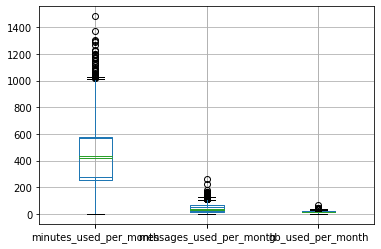

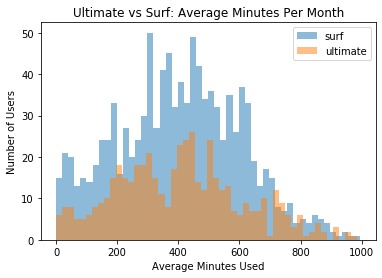

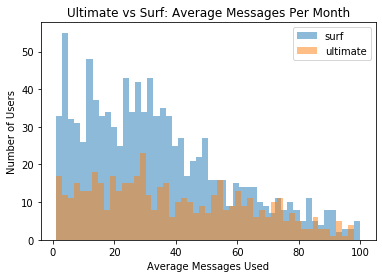

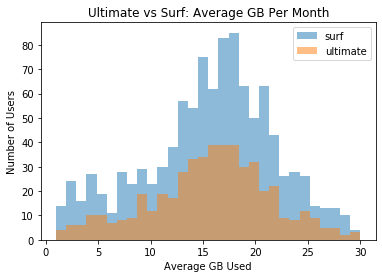

In [17]:
#Plot boxplots to find outliers
surf_plan.boxplot(column = ['minutes_used_per_month', 'messages_used_per_month', 'gb_used_per_month'])
ultimate_plan.boxplot(column = ['minutes_used_per_month','messages_used_per_month', 'gb_used_per_month'])

#Drop outliers
surf_plan.drop(surf_plan.index[(surf_plan['minutes_used_per_month'] > 1000)], inplace = True)
ultimate_plan.drop(ultimate_plan.index[(ultimate_plan['minutes_used_per_month'] > 1000)], inplace = True)

surf_plan.drop(surf_plan.index[(surf_plan['messages_used_per_month'] > 100)], inplace = True)
ultimate_plan.drop(ultimate_plan.index[(ultimate_plan['messages_used_per_month'] > 100)], inplace = True)

surf_plan.drop(surf_plan.index[(surf_plan['gb_used_per_month'] > 30)], inplace = True)
ultimate_plan.drop(ultimate_plan.index[(ultimate_plan['gb_used_per_month'] > 30)], inplace = True)

#Average minutes per month per plan
plt.figure()
plt.hist(surf_plan['minutes_used_per_month'], bins = 50, alpha = 0.5, label = 'surf')
plt.hist(ultimate_plan['minutes_used_per_month'], bins = 50, alpha = 0.5, label = 'ultimate')
plt.xlabel('Average Minutes Used')
plt.ylabel('Number of Users')
plt.title('Ultimate vs Surf: Average Minutes Per Month')
plt.legend()

#Average messages per month per plan
plt.figure()
plt.hist(surf_plan['messages_used_per_month'], bins = 50, alpha = 0.5, label = 'surf')
plt.hist(ultimate_plan['messages_used_per_month'], bins = 50, alpha = 0.5, label = 'ultimate')
plt.xlabel('Average Messages Used')
plt.ylabel('Number of Users')
plt.title('Ultimate vs Surf: Average Messages Per Month')
plt.legend()

#Average gigabytes per month per plan
plt.figure()
plt.hist(surf_plan['gb_used_per_month'], bins = 30, alpha = 0.5, label = 'surf')
plt.hist(ultimate_plan['gb_used_per_month'], bins = 30, alpha = 0.5, label = 'ultimate')
plt.xlabel('Average GB Used')
plt.ylabel('Number of Users')
plt.title('Ultimate vs Surf: Average GB Per Month')
plt.legend()

display(ultimate_plan.median())
display(surf_plan.median())

We created histograms for the average minutes, messages, and gigabytes and compared the data for both plans.

Average Minutes per Month:
Both plans are positive skewed. The surf plan peaks right around 350 where as, the ultimate plan peaks at about 450. The ultimate plan's peak is right about where the mean is located. The ultimate plan reaches a low point at about 700 minutes. The surf plan declines drastically around 625.

Average Messages per Month:
Both graphs are positive skewed. the most common value of surf plan is at 5 messages per month and the ultimate plan is at 30. Based on the graph surf plan users send few messages per month on average than ultimate users.

Average GB per Month:
Both graphs are positive skewed. The highest number of users for both plans used between 13 and 22 gigabytes. The highest point of both graphs is around 17 gigabytes. The lowest point for ultimate users is at 28 gigabytes. The lowest point for surf users is at 6 gigabytes.

## Test the Hypotheses

### Compare Average Profit for Both Plans

In [18]:
#Find average profit from filtered ultimate plan
print("The average monthly profit of ultimate plan is:", ultimate_plan['monthly_cost'].mean())


#Find average profit from filtered surf plan
print("The average monthly profit of surf plan is:", surf_plan['monthly_cost'].mean())

#Perform a t-test
alpha = 0.05
results = st.ttest_ind(ultimate_plan['monthly_cost'], surf_plan['monthly_cost'], equal_var = False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

The average monthly profit of ultimate plan is: 70.0
The average monthly profit of surf plan is: 50.55367269267364
p-value:  1.0463667021377375e-57
We reject the null hypothesis


We want to test the hypotheses that the average revenue from users of ultimate and surf calling plans differs. By filtering outliers, the data is normally distributes so we can use the t-test to compare the average profit for both plans.

The null hypothesis H0 is, the average profit from users of ultimate plan does not differ from the average profit from users of surf plan. The alternative hypothesis is, the average profit from users of ultimate does differ from the average profit from users of surf.

The value obtained from the p-value states that we can reject the null hypothesis. The average profit from users of ultimate does differ from the average profit for users of surf.

### Compare Average Revenue from Users in NY-NJ Area to Other Users

In [19]:
#Merge both plans
both_plans = ultimate_plan.append(surf_plan)

#Filter out users from NY-NJ
NYNJ = users[users['city'].str.contains('NY-NJ')]
users_NYNJ = NYNJ['user_id']
filtered_NYNJ_users = both_plans.query('user_id in @users_NYNJ')
filtered_NYNJ_users.head()

#Average profit of NY-NJ users
average_profit_NYNJ = filtered_NYNJ_users['monthly_cost'].mean()
print(average_profit_NYNJ)

#Filter out non NY-NJ users
non_NYNJ = users[~users['city'].str.contains('NY-NJ')]
non_users_NYNJ = non_NYNJ['user_id']
filtered_non_NYNJ_users = both_plans.query('user_id in @non_users_NYNJ')
filtered_non_NYNJ_users.head()

#Average profit of NY-NJ users
average_profit_non_NYNJ = filtered_non_NYNJ_users['monthly_cost'].mean()
print(average_profit_non_NYNJ)

#Perform a t-test
alpha = 0.05
results = st.ttest_ind(filtered_NYNJ_users['monthly_cost'], filtered_non_NYNJ_users['monthly_cost'], equal_var = False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

51.89334630350194
57.76381395348838
p-value:  0.0061037235315793865
We reject the null hypothesis


We compared the average revenue from users in New York and New Jersey area to other users. We did this again by using a individual t-tests.

The null hypothesis H0: The average profit from users in the New York and New Jersey does not differ from the average profit from other users. The alternate hypothesis is the average profit from users in New York and New Jersey differ from the average profit from other users.

We found that we can reject the null hypothesis. The average profit from users in New York and New Jersey does not differ from the average profit from other users.

## Overall Conclusion

The only missing data was from the 'churn_date' (the date the user left the company) in the 'users' table. The data was missing because the user was still active with the company. We replace missing values with the date December, 31th 2018. Errors in dates that were posted after the churn date and outliers were removed from the data. 

We used t-test to find if the average profit per month differs from plan to plan. The data suggested that the plans do differ.

Findings from the data suggest that more profit is made from the ultimate plan. The average monthly profit of the ultimate plan is 70.58 and the average monthly profit of the surf plan is 55.07. Based on this knowledge Megaline should adjust advertise such that the ultimate plan gets more advertisement. 